In [1251]:
import copy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [1252]:
dataset = pd.read_csv('data/dataset/final.csv')

In [1253]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [1254]:
dataset.set_index('date', inplace=True)

In [1255]:
dataset.drop(['realized_variance'], axis=1, inplace=True)

In [1256]:
dataset.head()
dataset.dropna(inplace=True)

In [1257]:
day = 14

dataset['y_mu'] = (dataset.shift(-day)['usd/cad'] / dataset['usd/cad'] - 1)
dataset['y_jump'] = dataset.shift(-day)['jump']
dataset['y_bipower_variance'] = dataset.shift(-day)['bipower_variance']

dataset['jumplag1'] = dataset.shift(1)['jump']
dataset['bipowerlag1'] = dataset.shift(1)['bipower_variance']
dataset['mulag1'] = dataset.shift(day)['y_mu']

In [1258]:
dataset.dropna(inplace=True)

y_mu = dataset['y_mu']
y_jump = dataset['y_jump']
y_bipower_variance = dataset['y_bipower_variance']
dataset = dataset.drop(['y_mu', 'y_jump', 'y_bipower_variance'], axis=1)

[0.20982111 0.40008786 0.54509423 0.64004956 0.71601966 0.75863543
 0.78903452 0.81317045 0.83202781 0.84940014 0.86345501 0.87562032
 0.88650677 0.89696794 0.90702783 0.91609451 0.92442794 0.93173134
 0.93844467 0.94454413 0.95003663 0.95469875 0.95881293 0.96257531
 0.9662244  0.9690537  0.97177116 0.9741863  0.97654181 0.97856036
 0.98036132 0.98211971 0.98381112 0.98532912 0.98666357 0.98783036
 0.98888391 0.98990499 0.99092369 0.99190042 0.99276596 0.99349502
 0.99414915 0.99474641 0.99526833 0.99574019 0.99617044 0.99655001
 0.99687676 0.99719241 0.9974699  0.99773469 0.99798451 0.99820973
 0.99841849 0.9985996  0.99877063 0.99892543 0.99907462 0.99921206
 0.99932618 0.99943398 0.99951888 0.99959292 0.99965634 0.99971152
 0.99975713 0.9997996  0.99983285 0.99986303 0.99989098 0.99991391
 0.99993106 0.99994382 0.9999558  0.99996605 0.99997342 0.99997972
 0.99998573 0.99998991 0.9999925  0.99999475 0.99999681 0.99999831
 0.99999925 1.         1.         1.         1.         1.
 1.

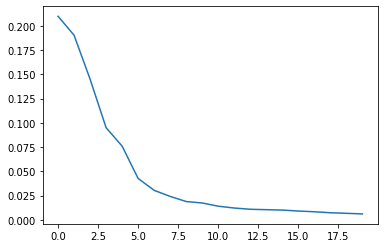

In [1259]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


predictedVariable = y_mu

X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)



scaler = StandardScaler()
dataset.dropna(inplace=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train)


print(np.cumsum(np.array(pca.explained_variance_ratio_)))

plt.plot(list(range(20)), (np.array(pca.explained_variance_ratio_))[:20])
plt.show()

X_train = pd.DataFrame(pca.transform(X_train)).iloc[:, :15]
X_test = pd.DataFrame(pca.transform(X_test)).iloc[:, :15]

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))


In [1260]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-13.661308,3.067615,-4.696855,-2.391327,4.231351,1.665363,-3.839929,1.693111,-2.348031,4.348528,1.378563,0.446154,-0.277225,0.446839,0.042590
1,-13.661573,3.060134,-4.679933,-2.319196,4.319078,1.628660,-3.846859,1.736357,-2.365571,4.347436,1.391103,0.549346,-0.351039,0.362005,0.128963
2,-13.671663,3.028191,-4.622876,-2.130125,4.521438,1.565347,-3.795826,1.337632,-2.321807,4.516947,1.270788,0.410026,-0.250120,0.458890,-0.012297
3,-13.722847,3.017906,-4.569253,-2.136573,4.440642,1.563242,-3.830190,1.040846,-2.238185,4.715565,1.180094,1.340625,-0.769835,0.176730,0.666272
4,-13.771433,3.129300,-4.582720,-2.761143,3.582728,2.252011,-3.558273,-0.627875,-1.922333,5.289077,0.988188,-0.094151,0.067971,0.481069,-0.117715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,-12.663250,2.321513,-3.534598,-2.574421,3.154398,2.251768,-0.568650,1.858421,-0.175535,-0.258353,-0.983251,0.279413,-0.603328,-0.270926,1.363046
744,-12.622242,2.228623,-3.397801,-2.342320,3.257653,2.128447,-0.611357,1.940174,-0.293519,-0.415084,-0.893360,-0.199790,-0.314850,-0.119180,0.973745
745,-12.513209,2.251921,-3.447721,-2.200067,3.664661,2.004631,-0.654238,1.935662,-0.320053,-0.526348,-0.899548,-0.347638,-0.212377,0.028595,0.816498
746,-12.568330,2.227447,-3.387575,-2.013828,3.771403,1.955825,-0.674036,1.796350,-0.283777,-0.427773,-0.972592,-0.139227,-0.327491,-0.035200,0.987758


In [1261]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
alpha = [0.03]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test))**2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)

sse:  0.11808660963359435
0.03


<AxesSubplot: >

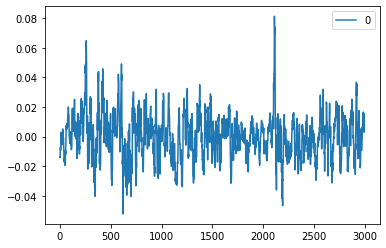

In [1262]:
y_train_res.plot()

In [1263]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])

0 -0.0
1 0.0
2 0.0
3 0.0
4 -0.0
5 0.0
6 -0.0
7 -0.0
8 -0.0
9 -0.0
10 0.0
11 0.0
12 0.0
13 -0.0
14 -0.0


/Users/sebastienlegros/Git_code/pair_trading/.virtualenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


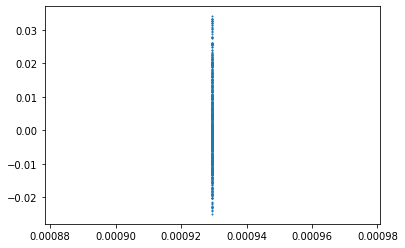

In [1264]:
import matplotlib.pyplot as plt
# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

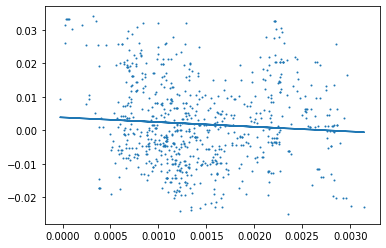

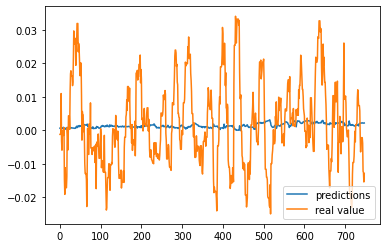

In [1265]:
best_sse = 100000
max_feature = [2, 3, 4]
max_depth = [2, 3, 4]
# max_feature = [2]
# max_depth = [2]
suivi = {'max_depth':[], 'max_feature':[], 'sse':[]}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res))**2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod


y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()

In [1266]:
suivi

{'max_depth': [2, 3, 4, 2, 3, 4, 2, 3, 4],
 'max_feature': [2, 2, 2, 3, 3, 3, 4, 4, 4],
 'sse': [500.4187656363486,
  505.58238726689007,
  510.61375868826764,
  502.8281061999866,
  506.0157836162055,
  515.1770665687418,
  506.0974138106712,
  513.3567362819341,
  519.9494228836988]}

In [1267]:
pipe_forest['rf'].feature_importances_

array([0.16359125, 0.10521677, 0.09742875, 0.07509948, 0.03348584,
       0.03797715, 0.13880467, 0.04978183, 0.05501366, 0.10187049,
       0.0810901 , 0.01446704, 0.00541314, 0.02882387, 0.01193595])

In [1268]:
# predictions = pipe.predict(dataset) + pipe_forest.predict(dataset)
# residuals = predictions - y_mu
#
# dataset['reslag1'] = residuals.shift(1)
# dataset['reslag2'] = residuals.shift(2)
# dataset['reslag3'] = residuals.shift(3)
#
# y_jump = y_jump.iloc[3:]
# y_bipower_variance = y_bipower_variance.iloc[3:]
#
# dataset.dropna(inplace=True)

[0.20982111 0.40008786 0.54509423 0.64004956 0.71601966 0.75863543
 0.78903452 0.81317045 0.83202781 0.84940014 0.86345501 0.87562032
 0.88650677 0.89696794 0.90702783 0.91609451 0.92442794 0.93173134
 0.93844467 0.94454413 0.95003663 0.95469875 0.95881293 0.96257531
 0.9662244  0.9690537  0.97177116 0.9741863  0.97654181 0.97856036
 0.98036132 0.98211971 0.98381112 0.98532912 0.98666357 0.98783036
 0.98888391 0.98990499 0.99092369 0.99190042 0.99276596 0.99349502
 0.99414915 0.99474641 0.99526833 0.99574019 0.99617044 0.99655001
 0.99687676 0.99719241 0.9974699  0.99773469 0.99798451 0.99820973
 0.99841849 0.9985996  0.99877063 0.99892543 0.99907462 0.99921206
 0.99932618 0.99943398 0.99951888 0.99959292 0.99965634 0.99971152
 0.99975713 0.9997996  0.99983285 0.99986303 0.99989098 0.99991391
 0.99993106 0.99994382 0.9999558  0.99996605 0.99997342 0.99997972
 0.99998573 0.99998991 0.9999925  0.99999475 0.99999681 0.99999831
 0.99999925 1.         1.         1.         1.         1.
 1.

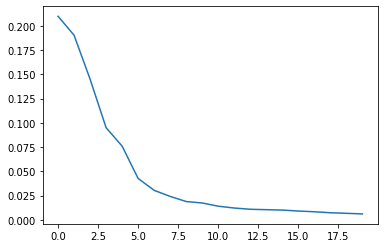

sse:  2.3090898060135404e-06
sse:  2.3090898060135404e-06
sse:  2.3090898060135404e-06
sse:  2.3090898060135404e-06
sse:  2.3090898060135404e-06
sse:  2.3090898060135404e-06
sse:  2.025934287453508e-06
1e-05
0 0.0
1 -6.868837950251125e-06
2 -0.0
3 4.346999754825287e-06
4 -6.54291631708809e-06
5 2.446330841185183e-06
6 0.0
7 5.254453997898184e-06
8 0.0
9 0.0
10 -0.0
11 0.0
12 -0.0
13 -0.0
14 -0.0


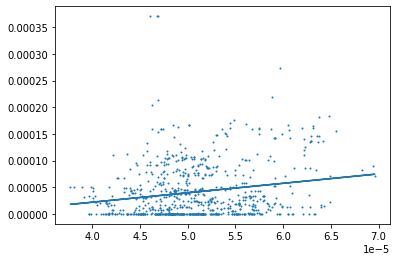

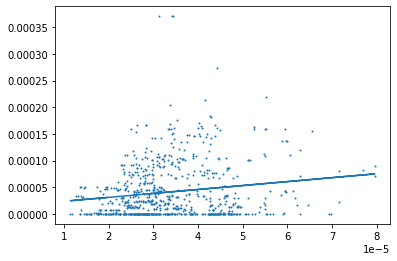

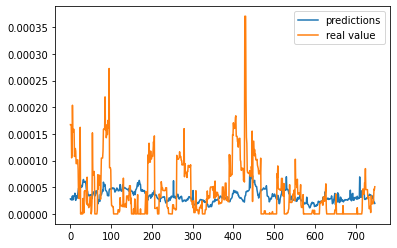

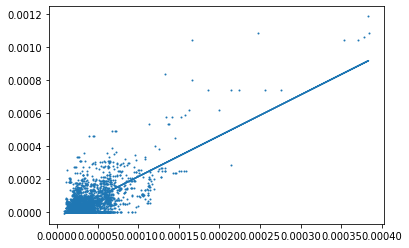

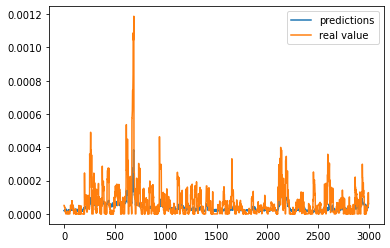

{'max_depth': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4], 'max_feature': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], 'sse': [0.02108331159958272, 0.020880704657683817, 0.020550667277440243, 0.020982548776962515, 0.020825934838476435, 0.02052548594688489, 0.021062209722135555, 0.02086994946905573, 0.020714990497450916, 0.02109857627594434, 0.02098513387934756, 0.020793532934315136]}


In [1269]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

predictedVariable = y_jump

X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)



scaler = StandardScaler()
dataset.dropna(inplace=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train)


print(np.cumsum(np.array(pca.explained_variance_ratio_)))

plt.plot(list(range(20)), (np.array(pca.explained_variance_ratio_))[:20])
plt.show()

X_train = pd.DataFrame(pca.transform(X_train)).iloc[:, :15]
X_test = pd.DataFrame(pca.transform(X_test)).iloc[:, :15]

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test)) ** 2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)
# y_train_res.plot()
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])
import matplotlib.pyplot as plt

# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()
best_sse = 100000
max_feature = [1, 2, 3, 4]
max_depth = [2, 3, 4]
# max_feature = [2]
# max_depth = [2]
suivi = {'max_depth': [], 'max_feature': [], 'sse': []}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b, criterion='absolute_error'))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res)) ** 2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod

y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()
suivi
pipe_forest['rf'].feature_importances_
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m * y_train_pred + b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()
print(suivi)

[0.20982111 0.40008786 0.54509423 0.64004956 0.71601966 0.75863543
 0.78903452 0.81317045 0.83202781 0.84940014 0.86345501 0.87562032
 0.88650677 0.89696794 0.90702783 0.91609451 0.92442794 0.93173134
 0.93844467 0.94454413 0.95003663 0.95469875 0.95881293 0.96257531
 0.9662244  0.9690537  0.97177116 0.9741863  0.97654181 0.97856036
 0.98036132 0.98211971 0.98381112 0.98532912 0.98666357 0.98783036
 0.98888391 0.98990499 0.99092369 0.99190042 0.99276596 0.99349502
 0.99414915 0.99474641 0.99526833 0.99574019 0.99617044 0.99655001
 0.99687676 0.99719241 0.9974699  0.99773469 0.99798451 0.99820973
 0.99841849 0.9985996  0.99877063 0.99892543 0.99907462 0.99921206
 0.99932618 0.99943398 0.99951888 0.99959292 0.99965634 0.99971152
 0.99975713 0.9997996  0.99983285 0.99986303 0.99989098 0.99991391
 0.99993106 0.99994382 0.9999558  0.99996605 0.99997342 0.99997972
 0.99998573 0.99998991 0.9999925  0.99999475 0.99999681 0.99999831
 0.99999925 1.         1.         1.         1.         1.
 1.

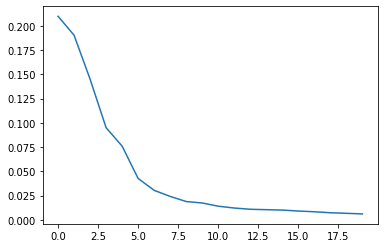

sse:  1.4772354230553963e-05
sse:  1.4772354230553963e-05
sse:  1.4772354230553963e-05
sse:  1.4772354230553963e-05
sse:  1.4772354230553963e-05
sse:  1.4772354230553963e-05
sse:  6.958724996179051e-06
1e-05
0 2.2390284036870837e-05
1 -4.234027684401451e-05
2 -3.162510347544343e-05
3 8.107401417757737e-05
4 -1.3079862567390582e-05
5 5.895441172585192e-05
6 3.2409472431739766e-05
7 1.8330085718595795e-05
8 0.0
9 3.388837168918374e-06
10 1.84172387371798e-05
11 -6.858745764052216e-07
12 0.0
13 0.0
14 0.0


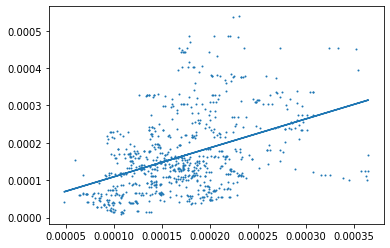

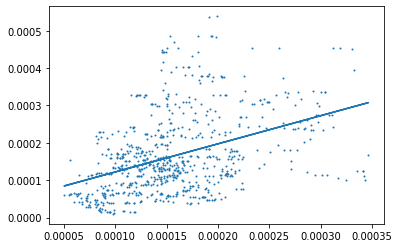

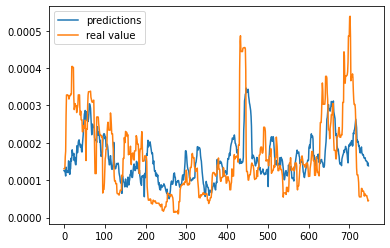

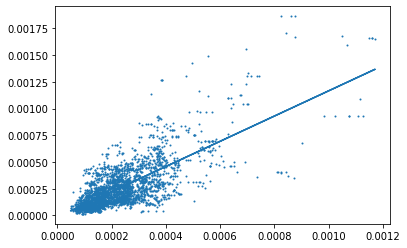

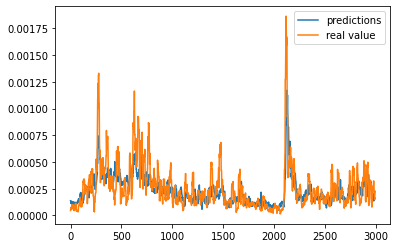

{'max_depth': [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4], 'max_feature': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], 'sse': [0.053441281131235065, 0.05354988394506301, 0.05446183656868102, 0.05363654899043479, 0.054165153015669036, 0.05585409708376111, 0.05401701598250711, 0.05457532723968092, 0.05655503394741637, 0.05485604060054265, 0.05583674709766553, 0.05760053227917364]}


In [1270]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

predictedVariable = y_bipower_variance

X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)



scaler = StandardScaler()
dataset.dropna(inplace=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train)


print(np.cumsum(np.array(pca.explained_variance_ratio_)))

plt.plot(list(range(20)), (np.array(pca.explained_variance_ratio_))[:20])
plt.show()

X_train = pd.DataFrame(pca.transform(X_train)).iloc[:, :15]
X_test = pd.DataFrame(pca.transform(X_test)).iloc[:, :15]

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test)) ** 2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)
# y_train_res.plot()
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])
import matplotlib.pyplot as plt

# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()
best_sse = 100000
max_feature = [1, 2, 3, 4]
max_depth = [2, 3, 4]
# max_feature = [2]
# max_depth = [2]
suivi = {'max_depth': [], 'max_feature': [], 'sse': []}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b, criterion='absolute_error'))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res)) ** 2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod

y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()
suivi
pipe_forest['rf'].feature_importances_
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m * y_train_pred + b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()
print(suivi)